# Projet GlassDoor Jobs

### **L'objectif de projet est de predire le salaire**
Tout d'abord il s'agit d'un probleme d'apprentissage supervise, nous avons un dataset qui contient le X feature et on a un target Y.
L'apprentissage supervise a deux categories:
- La classification 
- La regression
- On veut predire le salaire qui est un valeur quantitative donc on va utilise de modele de regression.
- Les etapes de l'apprentissage supervise sont: 
1. Préparation des données

  *   Nettoyer les données
  *   Visualisez les données 
  *   Diviser les données nettoyées en deux ensembles : un ensemble d'apprentissage et un ensemble de test
2.  Choisir un modèle
- Nous avons implemente des algorithmes comme : 
  *   Arbre de Decision
  *   K le plus proche voisin
  *   regression lineair
  *   Forêt aléatoire
3. Entrainer le modele
4. Évaluation du modèle










### Exploratory Data Analysis

* Identifier les erreurs évidentes,




* Avoir une meilleure compréhension des patterns au sein des données,
* Détecter les événements anormaux ou valeurs aberrantes,
* Trouver les relations intéressantes entre les variables.

In [662]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [663]:
df = pd.read_csv("glassdoor_jobs.csv")

In [664]:
df.shape

(956, 15)

In [665]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [666]:
df.head()

Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  
0                                                 -1  
1                                                 -1  
2                                                 -1  
3  Oak Ridge National Laboratory, National Renewa...  
4               Commerce Signals, Cardlytics, Yodlee

In [667]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


- Aucune Colonne n'a de valeurs NaN, mais il peut arriver que les valeurs NaN soient remplacées par d'autres valeurs telles que -1, 0, etc.

In [668]:
df.describe().T

count         mean         std  min      25%     50%      75%  \
Unnamed: 0  956.0   477.500000  276.117729  0.0   238.75   477.5   716.25   
Rating      956.0     3.601255    1.067619 -1.0     3.30     3.8     4.20   
Founded     956.0  1774.605649  598.942517 -1.0  1937.00  1992.0  2008.00   

               max  
Unnamed: 0   955.0  
Rating         5.0  
Founded     2019.0

- Les valeurs NaN sont remplacées par -1 dans les colonnes numériques.

### Analyse exploratoire des données et nettoyage des données

In [669]:
# Suppression d'une colonne indésirable
print('Shape before removing: {}'.format(df.shape))
df.drop(labels=['Unnamed: 0'], axis='columns', inplace=True)
print('Shape after removing: {}'.format(df.shape))

Shape before removing: (956, 15)
Shape after removing: (956, 14)


In [670]:
# Importation de bibliothèques de visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

####Nettoyage de colonne Rating

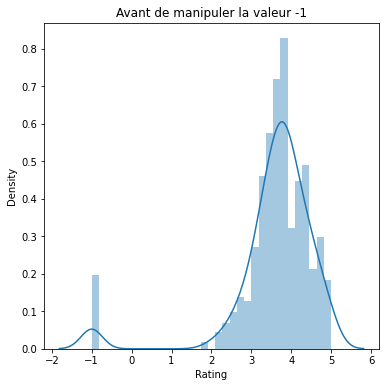

In [671]:
# Visualisation de la colonne Rating 
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p = plt.title('Avant de manipuler la valeur -1')


- Étant donné que la fonction d'évaluation suit la distribution gaussienne/normale, nous remplacerons les valeurs -1 par la moyenne de la distribution.

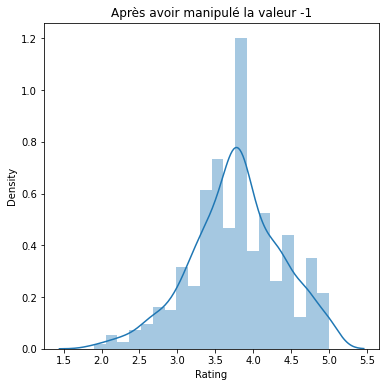

In [672]:
# Gerer des valeurs -1 dans la colonne Rating
df['Rating'] = df['Rating'].apply(lambda x: np.NaN if x==-1 else x)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p = plt.title('Après avoir manipulé la valeur -1')

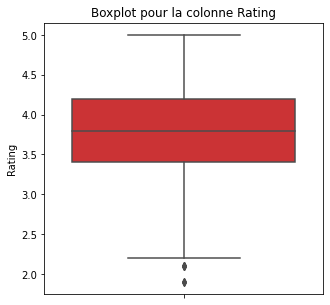

In [673]:
# Valeurs aberrantes dans le colonne Rating
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot pour la colonne Rating')
p = plt.ylabel('Rating')

####Nettoyage de la colonne Founded

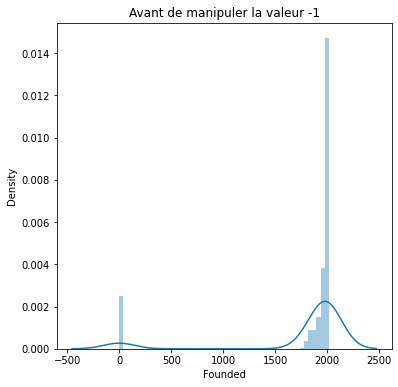

In [674]:
# Visualisation de la colonne  Founded 
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Founded'])
p = plt.title('Avant de manipuler la valeur -1')

- Étant donné que la colonne Founded ne suit pas la distribution gaussienne/normale mais est un graphique asymétrique à droite, nous remplacerons les valeurs -1 par la médiane de la distribution.

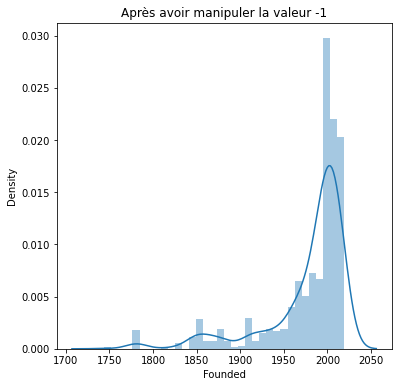

In [675]:
# Gerer des valeurs -1 dans la colonne Founded
df['Founded'] = df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
df['Founded'] = df['Founded'].fillna(int(df['Founded'].median()))
df['Founded'] = df['Founded'].astype('int')

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Founded'])
p = plt.title('Après avoir manipuler la valeur -1')

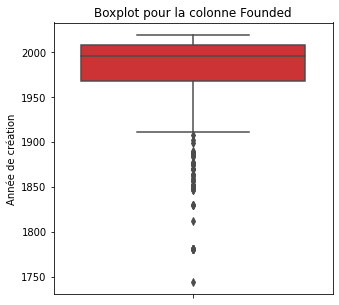

In [676]:
# Valeurs aberrantes dans Founded
plt.figure(figsize=(5,5))
sns.boxplot(y='Founded', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot pour la colonne Founded')
p = plt.ylabel('Année de création')

####Nettoyage de la colonne Job Title

In [677]:
# Nettoyage de colonne Job Title 
df['Job Title'].value_counts().nlargest(20)

Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  4
Pharmaco

In [678]:
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

df['job_title'] = df['Job Title'].apply(title_cleaner)
df['job_title'].value_counts()

data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
director           13
mle                13
Name: job_title, dtype: int64

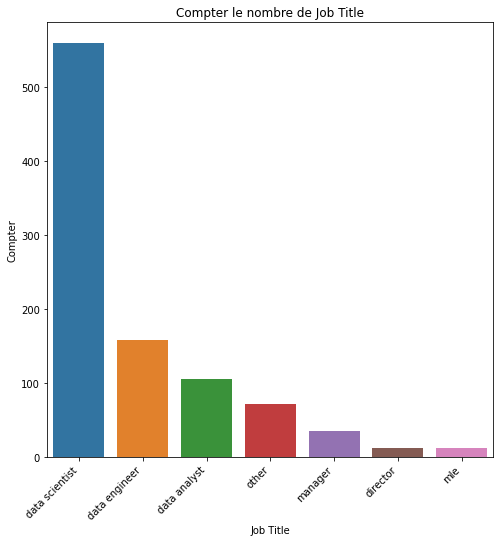

In [679]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_title', data=df, order = df['job_title'].value_counts().index)
p = plt.title('Compter le nombre de Job Title')
p = plt.xlabel('Job Title')
p = plt.ylabel('Compter')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [680]:
def title_seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'

df['job_seniority'] = df['Job Title'].apply(title_seniority)
df['job_seniority'].value_counts()

other    701
sr       252
jr         3
Name: job_seniority, dtype: int64

In [681]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_seniority', data=df, order = df['job_seniority'].value_counts().index)
p = plt.title('Compter le nombre de Job Seniority')
p = plt.xlabel('Job Seniority')
p = plt.ylabel('Compter')

In [682]:
# Supprimer la colonne Job Title 
df.drop(labels=['Job Title'], axis=1, inplace=True)

####Nettoyage de la colonne Salary Estimate

In [683]:
# Nettoyage de colonne Salary Estimate
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [684]:
salary.value_counts()

-1                  214
$86K-$143K            6
$54K-$115K            6
$49K-$113K            6
$21-$34 Per Hour      6
                   ... 
$74K-$119K            1
$55K-$97K             1
$15K-$16K             1
$61K-$106K            1
$62K-$113K            1
Name: Salary Estimate, Length: 417, dtype: int64

In [685]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [686]:
# Supprimer '$' et 'K' de la colonne 'Salary Estimate' 
salary = salary.apply(lambda x: x if type(x)== type(3.5) else x.replace('$','').replace('K',''))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [687]:
# Trouver des incohérences dans le colonne salaire
print("Taille de colonne salaire: ",len(salary.unique()))
salary.unique()[380:]

Taille de colonne salaire:  417


array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

- Convertir les salaires horaires en salaires annuels


In [688]:
salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace("employer provided salary:", ""))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 per hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ',
       '59-125 ', '80-142 ', '62-113 '], dtype=object)

In [689]:
# Conversion des salaires horaires en salaires annuels
def hourly_to_yearly(minlimit, maxlimit):
  x = minlimit.strip()
  y = maxlimit.strip()
  x = int(int(minlimit)*45*52/1000)
  y = int(int(maxlimit)*45*52/1000)
  return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '63-109', '68-125 ', '39-67 ',
       '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ', '51-88 ',
       '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

In [690]:
# Creation de la colonne pour salaire moyenne 
df['Salary'] = salary.apply(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('Avant de manipuler la valeur  NaN')

- Étant donné que la colonne salary d'évaluation suit la distribution gaussienne/normale, mais qu'il existe peu de valeurs aberrantes, nous remplacerons les valeurs -1 par la médiane de la distribution.

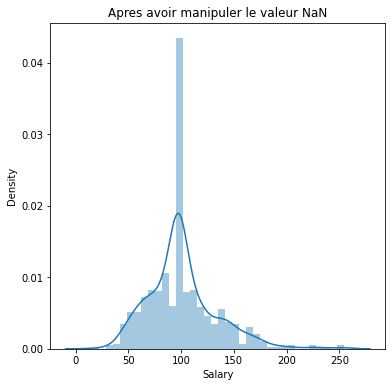

In [691]:
# Gere le valeur NaN values dans le colonne Salary
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('Apres avoir manipuler le valeur NaN')

In [692]:
# Valeurs aberrantes de la colonne Salary
plt.figure(figsize=(5,5))
g = sns.boxplot(y='Salary', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Salary')
p = plt.ylabel('Salary')

####Nettoyage de la colonne Company Name

In [693]:
# Nettoyage de la colonne Company Name
df["Company Name"] = df['Company Name'].apply(lambda x: x.split("\n")[0])

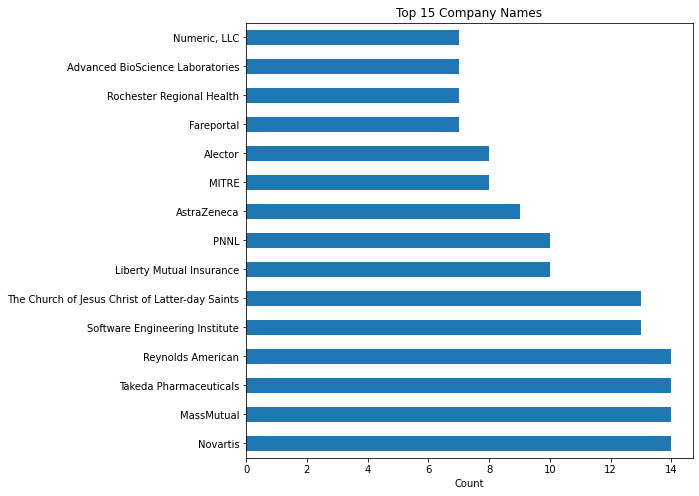

In [694]:
plt.figure(figsize=(8,8))
g = df["Company Name"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

In [695]:
# Creation de la colonne 'job_state'
df['job_location'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print('Nombre total d emplacements uniques: {}'.format(len(df['job_location'].unique())))

Nombre total d emplacements uniques: 46


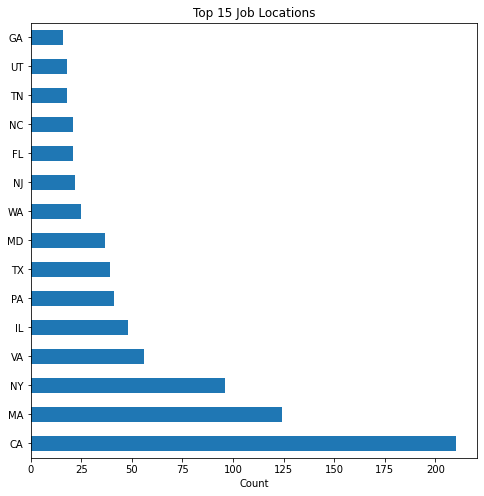

In [696]:
plt.figure(figsize=(8,8))
g = df["job_location"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Job Locations')
p = plt.xlabel('Count')

#### Nettoyage de colonne Size

In [697]:
df['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [698]:
# Nettoyage de la colonne 'Size'
def size_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

df['Size'] = df['Size'].apply(size_simplifier)

In [699]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Size', data=df, order = df['Size'].value_counts().index)
p = plt.title('Count plot pour Company Size')
p = plt.xlabel('Company Size')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

#### Nettoyage de colonne Type of Ownership

In [700]:
# Nettoyage de la colonne 'Type of Ownership'
df['Type of ownership'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [701]:
def ownership_simplifier(text):
    if 'private' in text.lower():
      return 'Private'
    elif 'public' in text.lower():
      return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
      return 'Other Organization'
    else:
      return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

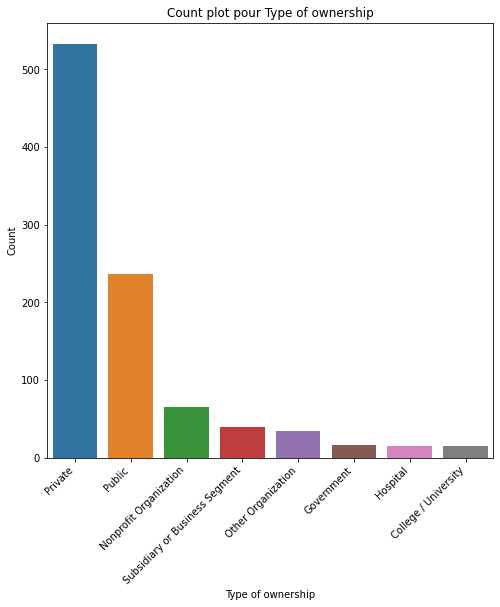

In [702]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
p = plt.title('Count plot pour Type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

#### Nettoyage de colonne Industry

In [703]:
# Nettoyage de la colonne 'Industry'
df['Industry'].value_counts()

Biotech & Pharmaceuticals                   148
IT Services                                  77
Computer Hardware & Software                 70
Insurance Carriers                           65
Enterprise Software & Network Solutions      56
                                           ... 
Farm Support Services                         1
Transportation Equipment Manufacturing        1
Motion Picture Production & Distribution      1
Other Retail Stores                           1
Beauty & Personal Accessories Stores          1
Name: Industry, Length: 63, dtype: int64

In [704]:
df['Industry'] = df['Industry'].apply(lambda x: 'Others' if x=='-1' else x)

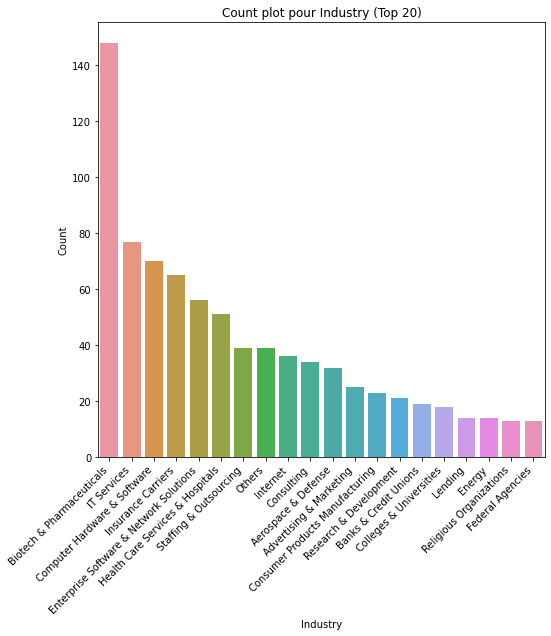

In [705]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Industry', data=df, order = df['Industry'].value_counts()[:20].index)
p = plt.title('Count plot pour Industry (Top 20)')
p = plt.xlabel('Industry')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

#### Nettoyage de colonne 'Sector'

In [706]:

df['Sector'].value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry            

In [707]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

In [708]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
p = plt.title('Count plot Pour Sector Top 20')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

#### Netotoyage de colonne 'Revenue'


In [709]:

df['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [710]:
def revenue_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown / Non-Applicable'
  else:
    return text
df['Revenue'] = df['Revenue'].apply(revenue_simplifier)

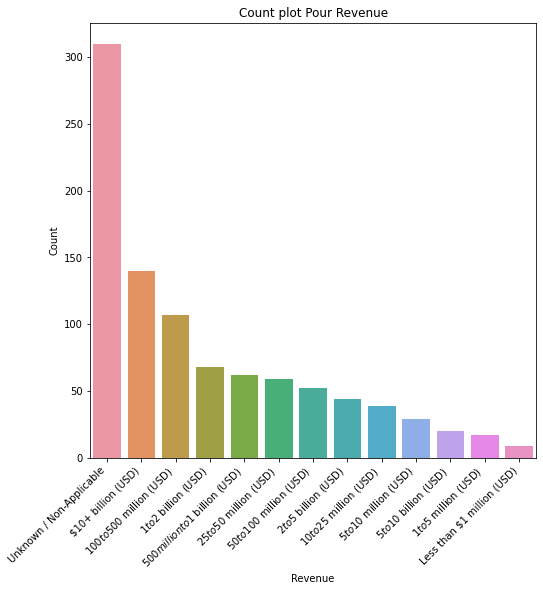

In [711]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
p = plt.title('Count plot Pour Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

#### Nettoyage de colonne 'Competitors'

In [712]:
# Nettoyage de colonne 'Competitors'
df['Competitors'].unique()

array(['-1',
       'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory',
       'Commerce Signals, Cardlytics, Yodlee',
       'Digital Realty, CoreSite, Equinix', 'Clicktripz, SmarterTravel',
       'Target, Costco Wholesale, Amazon', 'Novartis, Baxter, Pfizer',
       'bluebird bio, Agios Pharmaceuticals, Celgene',
       "Angie's List, HomeAdvisor, Thumbtack",
       'Leidos, CACI International, Booz Allen Hamilton',
       'Thermo Fisher Scientific, Enzymatics, Illumina', 'Pitney Bowes',
       'BrowserStack, Selenium Master, Perfecto Mobile',
       'Unilever, Procter & Gamble, Henkel',
       'UDR, AvalonBay Communities, Essex Property Trust',
       'American Express, Mastercard, Discover',
       'TASC, Vencore, Booz Allen Hamilton',
       'John Deere, Komatsu, CNH Industrial',
       'Travelers, Allstate, State Farm', 'Munich Re, Hannover RE, SCOR',
       'Skyhigh Networks, Zscaler, NortonLifeLock',
       'Slalom, Daugherty Busines

In [713]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

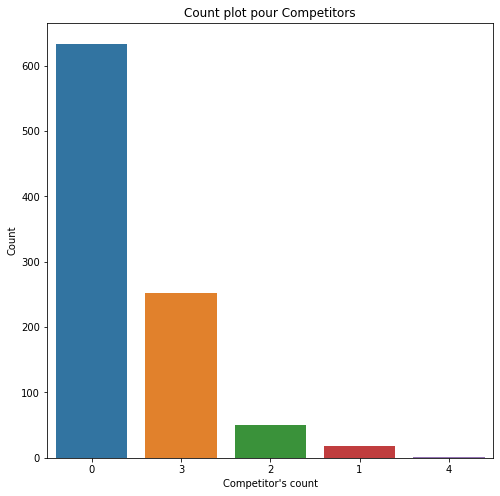

In [714]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Competitors', data=df, order = df['Competitors'].value_counts().index)
p = plt.title('Count plot pour Competitors')
p = plt.xlabel("Competitor's count")
p = plt.ylabel('Count')

In [715]:

df.tail()

Salary Estimate  \
951  $72K-$133K (Glassdoor est.)   
952   $56K-$91K (Glassdoor est.)   
953  $95K-$160K (Glassdoor est.)   
954                           -1   
955  $61K-$126K (Glassdoor est.)   

                                       Job Description  Rating  \
951  THE CHALLENGE\nEventbrite has a world-class da...     4.4   
952  The Auton Lab at Carnegie Mellon University is...     2.6   
953  Data Science ManagerResponsibilities:\n\nOvers...     3.2   
954  Loading...\n\nTitle: Data Engineer\n\nLocation...     4.8   
955  Returning Candidate? Log back in to the Career...     3.6   

                       Company Name         Location       Headquarters  \
951                      Eventbrite    Nashville, TN  San Francisco, CA   
952  Software Engineering Institute   Pittsburgh, PA     Pittsburgh, PA   
953                    Numeric, LLC    Allentown, PA    Chadds Ford, PA   
954                            IGNW       Austin, TX       Portland, OR   
955    Riverside Research Institute  Beavercreek, OH      Arlington, VA   

                       Size  Founded       Type of ownership  \
951  1001 to 5000 employees     2006                  Public   
952   501 to 1000 employees     1984    College / University   
953       1 to 50 employees     1996                 Private   
954    201 to 500 employees     2015                 Private   
955   501 to 1000 employees     1967  Nonprofit Organization   

                    Industry                  Sector  \
951                 Internet  Information Technology   
952  Colleges & Universities               Education   
953   Staffing & Outsourcing       Business Services   
954              IT Services  Information Technology   
955         Federal Agencies              Government   

                        Revenue  Competitors       job_title job_seniority  \
951  $100 to $500 million (USD)            3   data engineer            sr   
952    Unknown / Non-Applicable            0  data scientist         other   
953     $5 to $10 million (USD)            0         manager         other   
954    $25 to $50 million (USD)            1   data engineer         other   
955   $50 to $100 million (USD)            0  data scientist         other   

     Salary job_location  
951   102.5           TN  
952    73.5           PA  
953   127.5           PA  
954    97.5           TX  
955    93.5           OH

In [716]:


cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8,8))
corr = df[['Rating','Founded','Salary']].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, annot=True, linewidths=0.05, cbar_kws={"shrink": .5})
p = plt.title('Matrice de correlation entre les colonnes Rating, Founded, et Salary columns')

- Les colonnes Rating-Founded ont une corrélation positive, tandis que les colonnes Salary-Founded ont une corrélation négative. De plus, comme la corrélation n'est pas élevée entre toutes ces caractéristiques numériques, il n'y a pas de cas de multicolinéarité.

In [717]:
# Creation de la colonne 'job_in_headquarters'
df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

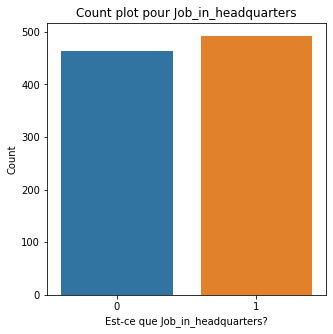

In [718]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='job_in_headquarters', data=df)
p = plt.title('Count plot pour Job_in_headquarters')
p = plt.xlabel("Est-ce que Job_in_headquarters?")
p = plt.ylabel('Count')


In [719]:
df['City'] = df['Location'].str.split(',').str[0]

In [720]:
df.drop(labels=['Location'], axis=1, inplace=True)

###Ajuster les colonnes

####Ajuster le colonne 'Sector' 

In [721]:
# Ajuster le colonne 'Sector' 

# Prendre le top 9 des secteurs et remplacer le reste par 'Others'
sector_list = list(df['Sector'].value_counts()[:10].index)

def sector_simplifier(text):
  if text not in sector_list:
    return 'Others'
  else:
    return text

df['Sector'] = df['Sector'].apply(sector_simplifier)

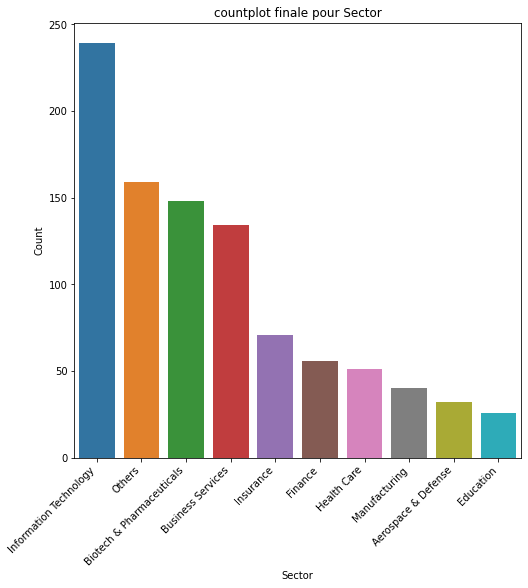

In [722]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts().index)
p = plt.title('countplot finale pour Sector')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

####Ajuster le colonne job_location

Les colonnes ayant plus de 10 catégories sont ajustées de manière à réduire la dimensionnalité.

In [723]:
# Ajuster 'job_location' 

# Prendre le top 9 des 'job_location'  et remplacer les autres par 'Others'
job_location_list = list(df['job_location'].value_counts()[:9].index)

def job_location_simplifier(text):
  if text not in job_location_list:
    return 'Others'
  else:
    return text

df['job_location'] = df['job_location'].apply(job_location_simplifier)

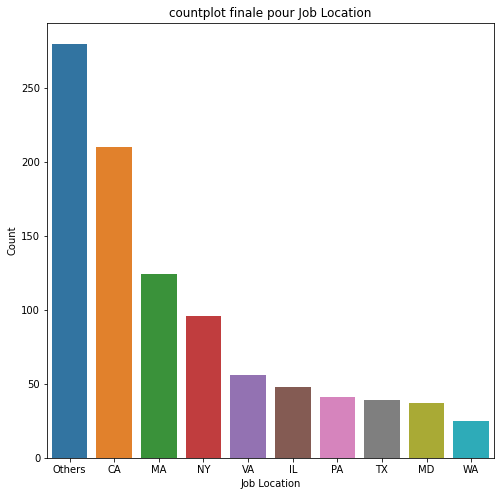

In [724]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_location', data=df, order = df['job_location'].value_counts().index)
p = plt.title('countplot finale pour Job Location')
p = plt.xlabel('Job Location')
p = plt.ylabel('Count')

In [725]:
df.drop(labels=['Salary Estimate','Job Description', 'Company Name', 'Headquarters', 'Industry', 'job_location'], axis=1, inplace=True)

In [726]:
df.columns

Index(['Rating', 'Size', 'Founded', 'Type of ownership', 'Sector', 'Revenue',
       'Competitors', 'job_title', 'job_seniority', 'Salary',
       'job_in_headquarters', 'City'],
      dtype='object')

In [727]:
# Renomme colonne
df.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Founded':'company_founded', 'Type of ownership':'type_of_ownership',
                   'Sector':'sector', 'Revenue':'revenue', 'Competitors':'competitors', 'Salary': 'salary'}, inplace=True)

####Gestion des caractéristiques catégorielles ordinales

- Les caractéristiques ordinales sont des variables catégorielles qui ont un certain ordre qui leur est associé (par exemple, size, etc.)

In [728]:
# Mappage des rangs à colonne  'company_size'
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df['company_size'] = df['company_size'].map(size_map)

In [729]:
# Mappage des rangs à colonne'revenue	' 
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

df['revenue'] = df['revenue'].map(revenue_map)

In [730]:
# Mappage des rangs a colonne 'job_seniority	' 
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

df['job_seniority'] = df['job_seniority'].map(job_seniority_map)


####Gestion des caractéristiques catégorielles nominales

- Les caractéristiques nominales sont des variables catégorielles qui n'ont pas d'importance numérique.

In [731]:
# Suppression de la colonne "type de propriété" à l'aide de get_dummies()
print('Avant: {}'.format(df.shape))
df = pd.get_dummies(columns=['type_of_ownership'], data=df, prefix='ownership')
print('Apres: {}'.format(df.shape))

Avant: (956, 12)
Apres: (956, 19)


In [732]:
# Suppression de la colonne 'sector' à l'aide de get_dummies()  
print('Avant: {}'.format(df.shape))
df = pd.get_dummies(columns=['sector'], data=df)
print('Apres: {}'.format(df.shape))

Avant: (956, 19)
Apres: (956, 28)


In [733]:
# Suppression de la colonne 'job_title' à l'aide de get_dummies() 
print('Avant: {}'.format(df.shape))
df = pd.get_dummies(columns=['job_title'], data=df)
print('Apres: {}'.format(df.shape))

Avant: (956, 28)
Apres: (956, 34)


In [734]:
# Suppression 'others' colonne pour reduire la dimentionalite et eviter piège dummy variable
df.drop(labels=['ownership_Other Organization', 'sector_Others', 'job_title_other'], axis=1, inplace=True)

### Import csv qui contient cost of living de ville

- Import le csv qui contient cost of living de ville

In [735]:
usa = pd.read_csv("advisorsmith_cost_of_living_index.csv")
usa = usa.drop(columns = "State")
usa.head()

City  Cost of Living Index
0     Abilene                  89.1
1      Adrian                  90.5
2       Akron                  89.4
3  Alamogordo                  85.8
4      Albany                  87.3

In [736]:
df1 = df.merge(usa, on='City', how='left')

In [737]:
df1.isna().sum()


company_rating                                0
company_size                                  0
company_founded                               0
revenue                                       0
competitors                                   0
job_seniority                                 0
salary                                        0
job_in_headquarters                           0
City                                          0
ownership_College / University                0
ownership_Government                          0
ownership_Hospital                            0
ownership_Nonprofit Organization              0
ownership_Private                             0
ownership_Public                              0
ownership_Subsidiary or Business Segment      0
sector_Aerospace & Defense                    0
sector_Biotech & Pharmaceuticals              0
sector_Business Services                      0
sector_Education                              0
sector_Finance                          

In [738]:
df1['Cost of Living Index'] = df1['Cost of Living Index'].fillna(value = df1['Cost of Living Index'].mean())

In [739]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.City = le.fit_transform(df1.City)

In [740]:
df1.head()

company_rating  company_size  company_founded  revenue  competitors  \
0             3.8             4             1973        6            0   
1             3.4             7             1984       10            0   
2             4.8             4             2010        7            0   
3             3.8             5             1965        8            3   
4             2.9             2             1998        0            3   

   job_seniority  salary  job_in_headquarters  City  \
0              0    72.0                    0     3   
1              0    87.5                    0   114   
2              0    85.0                    1    47   
3              0    76.5                    1   176   
4              0   114.5                    1   141   

   ownership_College / University  ...  sector_Information Technology  \
0                               0  ...                              0   
1                               0  ...                              0   
2                               0  ...                              0   
3                               0  ...                              0   
4                               0  ...                              0   

   sector_Insurance  sector_Manufacturing  job_title_data analyst  \
0                 0                     0                       0   
1                 0                     0                       0   
2                 0                     0                       0   
3                 0                     0                       0   
4                 0                     0                       0   

   job_title_data engineer  job_title_data scientist  job_title_director  \
0                        0                         1                   0   
1                        0                         1                   0   
2                        0                         1                   0   
3                        0                         1                   0   
4                        0                         1                   0   

   job_title_manager  job_title_mle  Cost of Living Index  
0                  0              0             92.900000  
1                  0              0            116.307057  
2                  0              0            116.307057  
3                  0              0            116.307057  
4                  0              0            128.000000  

[5 rows x 32 columns]

###Feature Selection

- Sélection des features en fonction du gain d'informations (mutual_info_regression) et de la matrice de corrélation

In [741]:
X = df1.drop('salary', axis=1)
y = df1['salary']

In [742]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [743]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7fc93594baf0>)

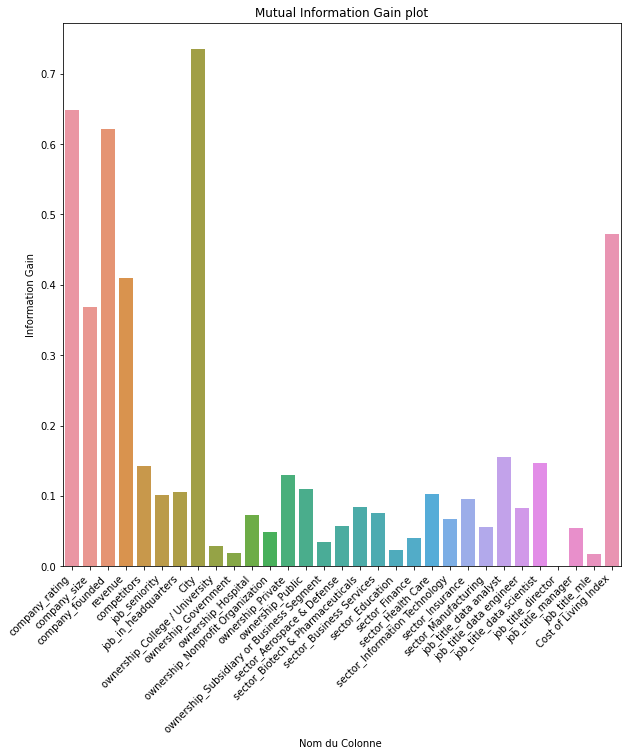

In [744]:
plt.figure(figsize=(10,10))
g = sns.barplot(x=X.columns, y=fs.scores_)
p = plt.title('Mutual Information Gain plot')
p = plt.xlabel('Nom du Colonne ')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

- D'après le tableau d'importance des colonnes, il est évident qu'il existe au moins 20 colonnes qui ont un impact sur la variable cible.

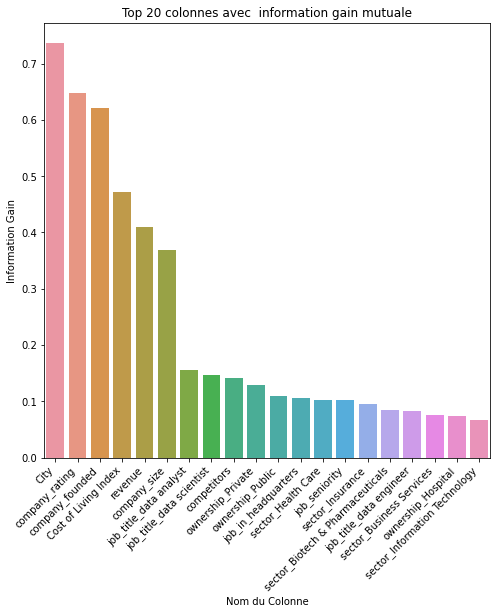

In [745]:
feature_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top20_feature = feature_imp.nlargest(n=20, columns=['Score'])

plt.figure(figsize=(8,8))
g = sns.barplot(x=top20_feature.index, y=top20_feature['Score'])
p = plt.title('Top 20 colonnes avec  information gain mutuale')
p = plt.xlabel('Nom du Colonne')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [746]:
# Trouver et tracer la matrice de corrélation pour les 20 principales features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X[top20_feature.index].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title(' matrice de Correlation ')

- Les plages de corrélation sont les suivantes :
* Corrélation forte : X > 0,7
-  Corrélation modérée : 0,5 < X < 0,7 
-  Corrélation faible : X < 0,5

- D'après la matrice de corrélation, il est évident que les caractéristiques (propriété_Public, propriété_Privé), (taille_entreprise, société_fondée), (job_title_data engineer, job_title_data scientist) et (company_founded, revenue) sont modérément corrélées. Par conséquent, supprimez les fonctionnalités 'Revenu', 'ownership_Public', 'job_title_data engineer' et 'company_size'.

In [747]:
X = X[top20_feature.index]
X.drop(labels=['ownership_Public', 'company_size', 'revenue', 'job_title_data engineer'], axis=1, inplace=True)

In [748]:
# Trouver et tracer la matrice de corrélation pour les 18 principales caractéristiques

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Matrice de corrélation après suppression des caractéristiques hautement corrélées')

In [749]:
X.columns

Index(['City', 'company_rating', 'company_founded', 'Cost of Living Index',
       'job_title_data analyst', 'job_title_data scientist', 'competitors',
       'ownership_Private', 'job_in_headquarters', 'sector_Health Care',
       'job_seniority', 'sector_Insurance', 'sector_Biotech & Pharmaceuticals',
       'sector_Business Services', 'ownership_Hospital',
       'sector_Information Technology'],
      dtype='object')

###Feature Scaling

In [750]:
X.head()

City  company_rating  company_founded  Cost of Living Index  \
0     3             3.8             1973             92.900000   
1   114             3.4             1984            116.307057   
2    47             4.8             2010            116.307057   
3   176             3.8             1965            116.307057   
4   141             2.9             1998            128.000000   

   job_title_data analyst  job_title_data scientist  competitors  \
0                       0                         1            0   
1                       0                         1            0   
2                       0                         1            0   
3                       0                         1            3   
4                       0                         1            3   

   ownership_Private  job_in_headquarters  sector_Health Care  job_seniority  \
0                  1                    0                   0              0   
1                  0                    0                   1              0   
2                  1                    1                   0              0   
3                  0                    1                   0              0   
4                  1                    1                   0              0   

   sector_Insurance  sector_Biotech & Pharmaceuticals  \
0                 0                                 0   
1                 0                                 0   
2                 0                                 0   
3                 0                                 0   
4                 0                                 0   

   sector_Business Services  ownership_Hospital  sector_Information Technology  
0                         0                   0                              0  
1                         0                   0                              0  
2                         1                   0                              0  
3                         0                   0                              0  
4                         1                   0                              0

In [751]:
from sklearn.preprocessing import StandardScaler
X_prev = X.copy()

sc_rating = StandardScaler()
X['company_rating'] = sc_rating.fit_transform(X[['company_rating']])

sc_founded = StandardScaler()
X['company_founded'] = sc_founded.fit_transform(X[['company_founded']])

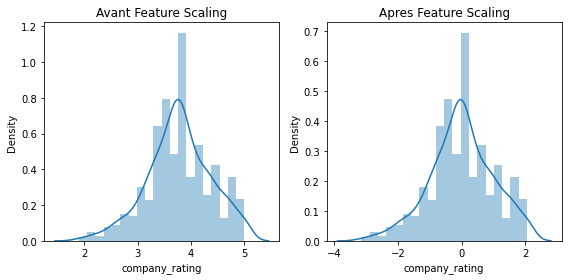

In [752]:
# Tracer company_rating avant et après la feature scaling
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
g = sns.distplot(a=X_prev['company_rating'])
p = plt.title('Avant Feature Scaling')


plt.subplot(1, 2, 2)
g = sns.distplot(a=X['company_rating'])
p = plt.title('Apres Feature Scaling')

plt.tight_layout()
plt.show()

- La mise à l'échelle des fonctionnalités ne modifie pas la distribution des données, elle ne fait que réduire l'échelle de cette fonctionnalité particulière

###Sélection du modèle

In [753]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import math

In [754]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [755]:
# Creating linear regression model
lr_model = LinearRegression()
# Fitting the dataset to the model
lr_model.fit(X_train, y_train)
y_train_predict = lr_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print('La performance du modèle sur la base d apprentissage')
print('--------------------------------------')

print("La précision du modèle de régression linéaire sur l'ensemble d'apprentissage est : {}%".format(round(lr_model.score(X_train, y_train),4)*100))
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('\n') 


y_test_predict = lr_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("La précision du modèle de régression linéaire sur l'ensemble de test est  : {}%".format(round(lr_model.score(X_test, y_test),4)*100))
print('Lerreur quadratique moyenne est {}'.format(rmse))

x_ax = range(len(y_test_predict))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_predict, label="predicted")
plt.title("Glass_door_jobs test et donnee predite")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='Meilleure',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 


La performance du modèle sur la base d apprentissage
--------------------------------------
La précision du modèle de régression linéaire sur l'ensemble d'apprentissage est : 37.64%
Lerreur quadratique moyenne est 25.712832730978732


La performance du modèle sur la base de test
--------------------------------------
La précision du modèle de régression linéaire sur l'ensemble de test est  : 23.65%
Lerreur quadratique moyenne est 27.885827706827396


In [756]:
# Création d'un modèle de régression d'arbre de décision

decision_model = DecisionTreeRegressor(criterion='mse', max_depth=10, random_state=0)
# Ajuster le jeu de données au modèle
decision_model.fit(X_train, y_train)
y_train_predict = decision_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print('La performance du modèle sur la base d apprentissage')
print('--------------------------------------')

print("La précision du modèle de régression de l'arbre de décision sur l'ensemble d'apprentissage est : {}% ".format(round(decision_model.score(X_train, y_train),4)*100))
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('\n')


y_test_predict = decision_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("La précision du modèle de régression  de l'arbre de décision  sur l'ensemble de test est  : {}%".format( round(decision_model.score(X_test, y_test),4)*100))
print('Lerreur quadratique moyenne est {}'.format(rmse))

x_ax = range(len(y_test_predict))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_predict, label="predicted")
plt.title("Glass_door_jobs test et donnee predite")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='Meilleure',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

La performance du modèle sur la base d apprentissage
--------------------------------------
La précision du modèle de régression de l'arbre de décision sur l'ensemble d'apprentissage est : 80.36% 
Lerreur quadratique moyenne est 14.429161988249506


La performance du modèle sur la base de test
--------------------------------------
La précision du modèle de régression  de l'arbre de décision  sur l'ensemble de test est  : 29.549999999999997%
Lerreur quadratique moyenne est 26.78718228726992


La performance du modèle sur la base d apprentissage
--------------------------------------
La précision du modèle de régression de forêt aléatoire sur l'ensemble d'apprentissage est : 93.64% 
Lerreur quadratique moyenne est 8.21263762612832


La performance du modèle sur la base de test
--------------------------------------
La précision du modèle de régression  de forêt aléatoire  sur l'ensemble de test est  : 56.35%
Lerreur quadratique moyenne est 21.086181848329648




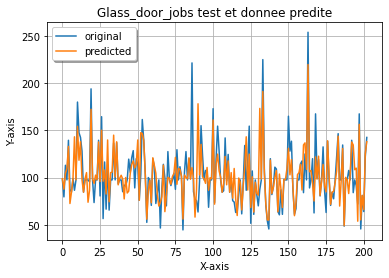

In [757]:
# Création d'un modèle de régression de forêt aléatoire
forest_model = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=0)
# Ajuster le jeu de données au modèle
forest_model.fit(X_train, y_train)
y_train_predict = forest_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print('La performance du modèle sur la base d apprentissage')
print('--------------------------------------')

print("La précision du modèle de régression de forêt aléatoire sur l'ensemble d'apprentissage est : {}% ".format(round(forest_model.score(X_train, y_train),4)*100))
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('\n')


y_test_predict = forest_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("La précision du modèle de régression  de forêt aléatoire  sur l'ensemble de test est  : {}%".format( round(forest_model.score(X_test, y_test),4)*100))
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('\n')
x_ax = range(len(y_test_predict))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_predict, label="predicted")
plt.title("Glass_door_jobs test et donnee predite")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='Meilleure',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [758]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    y_test_predict = model.predict(X_test) 
    error = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
 
    rmse_val.append(error) 
    print("La précision du modèle de KNN sur l'ensemble de test est  : {}%".format( round(model.score(X_test, y_test),4)*100))

    print('RMSE value for k= ' , K , 'is:', error)

La précision du modèle de KNN sur l'ensemble de test est  : 19.85%
RMSE value for k=  1 is: 28.57282632049001
La précision du modèle de KNN sur l'ensemble de test est  : 17.14%
RMSE value for k=  2 is: 29.051815862801217
La précision du modèle de KNN sur l'ensemble de test est  : 23.61%
RMSE value for k=  3 is: 27.89417457766869
La précision du modèle de KNN sur l'ensemble de test est  : 27.700000000000003%
RMSE value for k=  4 is: 27.137631562058424
La précision du modèle de KNN sur l'ensemble de test est  : 25.900000000000002%
RMSE value for k=  5 is: 27.4729638707287
La précision du modèle de KNN sur l'ensemble de test est  : 22.21%
RMSE value for k=  6 is: 28.149045094590228
La précision du modèle de KNN sur l'ensemble de test est  : 20.04%
RMSE value for k=  7 is: 28.539151367060402
La précision du modèle de KNN sur l'ensemble de test est  : 22.49%
RMSE value for k=  8 is: 28.097180754455103
La précision du modèle de KNN sur l'ensemble de test est  : 21.04%
RMSE value for k=  9 is

In [759]:
curve = pd.DataFrame(rmse_val) 
curve.plot()

Remarque :
- L'algorithme de **randomForest** est selectionne parmi tous les autres algorithmes car il a la valeur de precision la plus élevée.